# K-Means Cluster

K-Means is a centroid-based clustering algorithm that partitions data into K clusters in an iterative manner. The "means" become the center of each cluster and the hope is the iteration of finding new means converges to a "best" center. Wikipedia has a great visualization for the general idea behind the iterative algorithm: https://en.wikipedia.org/wiki/K-means_clustering 

1. The initial "means" are randomly choosen within the data domain. 
2. Each data point is then categorized to the mean with shortest distance. 
3. A new mean is created as the average of all data points for each cluster. 
4. We forget the old data point categories and each data point is newly categorized to the new mean with shortest distance. 
5. We forget the old centroid and create the new centroid as the average of all data points for each cluster.
5. We continue the loop of creating new centroids and new clusters of data points until the clusters produce minimal to no change. 

<a title="Chire, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:K-means_convergence.gif"><img width="512" alt="K-means convergence" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/512px-K-means_convergence.gif?20170530143526"></a>

Notice that our initial "means" for red and yellow are very off. That's okay! The iterative process moves these random guesses toward the clusters of data. In fact, Python uses a "greedy" algorithm to speed up the iterations, but that isn't important to know in order to make your first K-means clustering. 

Let's see how to implement a K-means cluster in Python using random data.

C:\Users\dcham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\dcham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

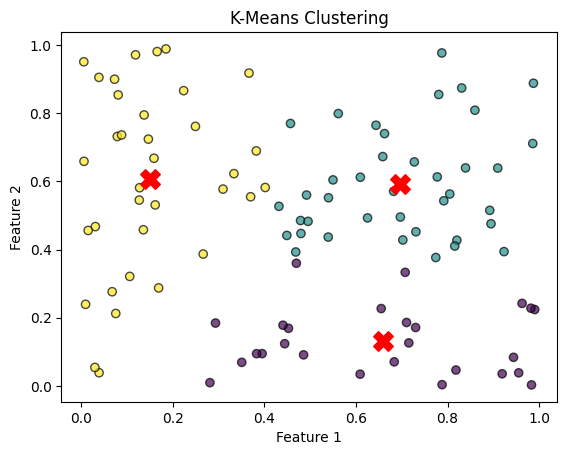

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.cluster import KMeans

# Generate random data to demonstrate clustering
data = np.random.rand(100, 2)

# Be sure to specify number of clusters!
clf_kmeans = KMeans(n_clusters=3)

# Fit the model to the data
# Note this is the final iteration result - we won't know about each iteration
clf_kmeans.fit(data)

# import packages for graphing
import matplotlib.pyplot as plt

# labels are the classification names for each cluster
labels = clf_kmeans.labels_

# centroids are the centers of the clusters for each label
centroids = clf_kmeans.cluster_centers_

# Plot the data points and centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

As you can see, we can always make a clustering but it may not be clear that data *actually* seems to cluster around the centroids. Let's see what happens when we apply it to some of the SKLearn datasets where we can consider the accuracy of the clustering for predicting future classifications.

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def create_2_feature_wine_data(feature_1, feature_2):
    # Load the wine dataset
    wine = load_wine()
    wine_data_2_features = np.column_stack((wine.data[:, feature_1], wine.data[:, feature_2]))
    return [wine, wine_data_2_features]

def run_kmeans_wine(wine, wine_data_2_features):
    X_train, X_test, y_train, y_test = train_test_split(wine_data_2_features, wine.target, test_size=0.2)

    # Create a decision tree classifier
    clf_kmeans_wine = KMeans(n_clusters=3)
    clf_kmeans_wine.fit(X_train, y_train)

    return [clf_kmeans_wine, X_train, X_test, y_train, y_test]

def graph_kmeans_wine(wine, clf_kmeans_wine, X_train, X_test, y_train, y_test, feature_1, feature_2):
    # Evaluate accuracy
    predictions = clf_kmeans_wine.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print_result = f'{int(round(accuracy, 2)*100)}%'

    # labels are the classification names for each cluster
    labels_wine_train = clf_kmeans_wine.labels_
    labels_wine_test = y_test

    # centroids are the centers of the clusters for each label
    centroids_wine = clf_kmeans_wine.cluster_centers_

    # Plot the data points and centroids
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels_wine_train, cmap='viridis', alpha=0.7, edgecolors='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_wine_test, cmap='viridis', alpha=0.3, edgecolors='k')
    plt.scatter(centroids_wine[:, 0], centroids_wine[:, 1], c='red', marker='X', s=200)
    plt.title(f'K-Means 2-feature Clustering Accuracy: {print_result}')
    plt.xlabel(f'{wine.feature_names[feature_1]}')
    plt.ylabel(f'{wine.feature_names[feature_2]}')
    plt.show()

## 2-Means Cluster

We know the wine dataset has excellent accuracy when using all 13 features, but we can't visualize a 13 dimensional space. Choose 2 features to create a 2d clustering for classification.
- 'alcohol': 0,
- 'malic_acid': 1,
- 'ash': 2,
- 'alcalinity_of_ash': 3,
- 'magnesium': 4,
- 'total_phenols': 5,
- 'flavanoids': 6,
- 'nonflavanoid_phenols': 7,
- 'proanthocyanins': 8,
- 'color_intensity': 9,
- 'hue': 10,
- 'od280/od315_of_diluted_wines': 11,
- 'proline': 12

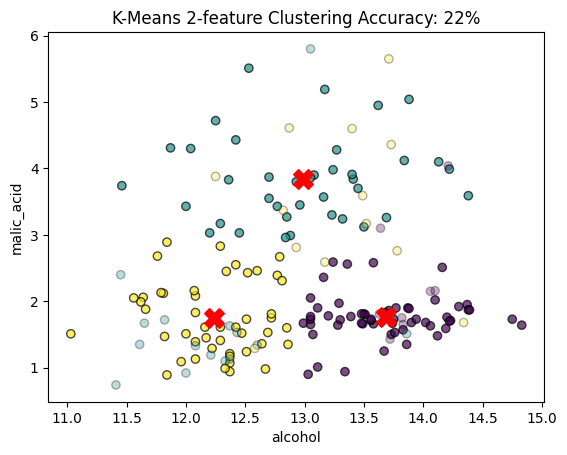

In [3]:
# Change these to graph different features!
feature_1 = 0
feature_2 = 1

wine, wine_data_2_features = create_2_feature_wine_data(feature_1, feature_2)
clf_kmeans_wine, X_train, X_test, y_train, y_test = run_kmeans_wine(wine, wine_data_2_features)
graph_kmeans_wine(wine, clf_kmeans_wine, X_train, X_test, y_train, y_test, feature_1, feature_2)

The darker circles represent our training data and the lighter circles represent our test data. Ideally, we'd want the nearby data for the training and test data to match color to signify they are being classified in the same way. 

## 2-Means vs 3-Means Clustering
Let's try to add 1 more feature and compare the 2-feature and 3-feature clusterings.

In [4]:
def create_2_and_3_feature_data(feature_1, feature_2, feature_3):
    # Load the wine dataset
    wine = load_wine()
    wine_data_2_features = np.column_stack((wine.data[:, feature_1], wine.data[:, feature_2]))
    wine_data_3_features = np.column_stack((wine.data[:, feature_1], wine.data[:, feature_2], wine.data[:, feature_3]))
    return [wine_data_2_features, wine_data_3_features]

def run_kmeans_3_wine(wine, wine_data_3_features):
    X_train, X_test, y_train, y_test = train_test_split(wine_data_3_features, wine.target, test_size=0.2)

    # Create a decision tree classifier
    clf_kmeans_wine = KMeans(n_clusters=3)
    clf_kmeans_wine.fit(X_train, y_train)

    return [clf_kmeans_wine, X_train, X_test, y_train, y_test]

def graph_kmeans_3_wine(wine, clf_kmeans_wine, X_train, X_test, y_train, y_test, feature_1, feature_2, feature_3):
    # Evaluate accuracy
    predictions_3 = clf_kmeans_wine.predict(X_test)
    accuracy_3 = accuracy_score(y_test, predictions_3)
    print_result_3 = f'{int(round(accuracy_3, 2)*100)}%'

    # labels are the classification names for each cluster
    labels_wine_train = clf_kmeans_wine.labels_
    labels_wine_test = y_test

    # centroids are the centers of the clusters for each label
    centroids_wine = clf_kmeans_wine.cluster_centers_

    # Plot the data points and centroids
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Note the shift from plotting on ax
    ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=labels_wine_train, cmap='viridis', alpha=0.7, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=labels_wine_test, cmap='viridis', alpha=0.3, edgecolors='k')
    ax.scatter(centroids_wine[:, 0], centroids_wine[:, 1], centroids_wine[:, 2], c='red', marker='X', s=200)
    
    ax.set_xlabel(f'{wine.feature_names[feature_1]}')
    ax.set_ylabel(f'{wine.feature_names[feature_2]}')
    ax.set_zlabel(f'{wine.feature_names[feature_3]}')

    plt.title(f'K-Means 3-feature Clustering Accuracy: {print_result_3}')
    plt.show()

Phew! At least we have an example of 3d plotting. 

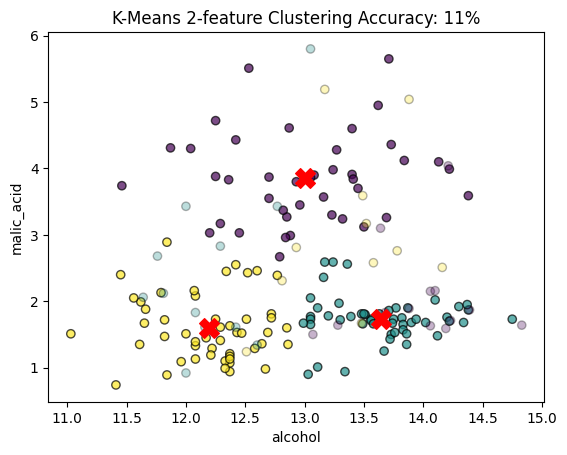

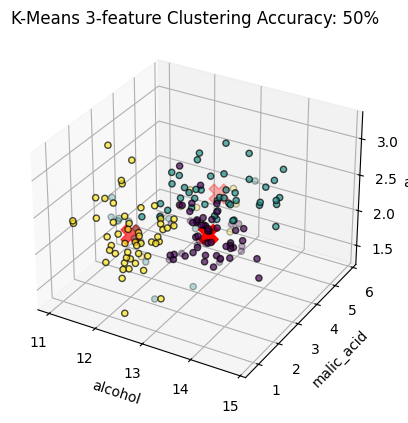

In [5]:
# Change these to graph different features!
feature_1 = 0
feature_2 = 1
feature_3 = 2

wine_data_2_features, wine_data_3_features = create_2_and_3_feature_data(feature_1, feature_2, feature_3)

clf_kmeans_wine, X_train, X_test, y_train, y_test = run_kmeans_wine(wine, wine_data_2_features)
graph_kmeans_wine(wine, clf_kmeans_wine, X_train, X_test, y_train, y_test, feature_1, feature_2)

clf_kmeans_wine_3, X_train_3, X_test_3, y_train_3, y_test_3 = run_kmeans_3_wine(wine, wine_data_3_features)
graph_kmeans_3_wine(wine, clf_kmeans_wine_3, X_train_3, X_test_3, y_train_3, y_test_3, feature_1, feature_2, feature_3)

While adding a feature usually increases the accuracy, it may not always increase the accuracy. There are techniques for figuring out which features are most important which will be presented in future lessons.